In [1]:
!pip install missingno

In [2]:
from sklearn.preprocessing import LabelEncoder
import kagglehub
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 0. Verisetini hazırlanması ve notebook içine eklenmesi

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
stealthtechnologies_predict_purity_and_price_of_honey_path = kagglehub.dataset_download('stealthtechnologies/predict-purity-and-price-of-honey')

print(stealthtechnologies_predict_purity_and_price_of_honey_path)
print('Data source import complete.')


/root/.cache/kagglehub/datasets/stealthtechnologies/predict-purity-and-price-of-honey/versions/2
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk(stealthtechnologies_predict_purity_and_price_of_honey_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/stealthtechnologies/predict-purity-and-price-of-honey/versions/2/honey_purity_dataset.csv


In [5]:
honey_path = path

# 1. Verisetine genel bakış

In [6]:
#NaN değerler bulunmayan orjinal datasetimize genel bir bakış atıyoruz.
honey_df = pd.read_csv(honey_path)
honey_df.head(3)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64


In [7]:
#Görüldüğü üzere Datasetimizde hiçbir boş değer bulunmamakta.
honey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


# 2. Datasetine rastgele eksik veriler eklemek.

In [8]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing
honey_df_missing = add_random_missing_values(dataframe = honey_df, missing_rate = 0.03)

In [9]:
#Boş değerler eklediğim datasetime honey_df_missing ismini verdim, şimdi bu datasetini gözlemleyeceğiz.
honey_df_missing.shape

(247903, 11)

In [10]:
honey_df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               240577 non-null  float64
 1   Density          240524 non-null  float64
 2   WC               240630 non-null  float64
 3   pH               240627 non-null  float64
 4   EC               240542 non-null  float64
 5   F                240566 non-null  float64
 6   G                240563 non-null  float64
 7   Pollen_analysis  240593 non-null  object 
 8   Viscosity        240523 non-null  float64
 9   Purity           240680 non-null  float64
 10  Price            240496 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [11]:
honey_df_missing.dtypes

,0
CS,float64
Density,float64
WC,float64
pH,float64
EC,float64
F,float64
G,float64
Pollen_analysis,object
Viscosity,float64
Purity,float64


In [12]:
#Sütunların istatistiksel verilerini gözlemledim.
honey_df_missing.describe().T

,count,mean,std,min,25%,50%,75%,max
CS,240577.0,5.500934,2.593981,1.00,3.260,5.51,7.740,10.00
Density,240524.0,1.535515,0.187838,1.21,1.370,1.54,1.700,1.86
WC,240630.0,18.503630,3.748517,12.00,15.260,18.51,21.760,25.00
pH,240627.0,4.996306,1.444267,2.50,3.750,4.99,6.250,7.50
EC,240542.0,0.799922,0.057932,0.70,0.750,0.80,0.850,0.90
F,240566.0,34.972843,8.656522,20.00,27.460,34.98,42.470,50.00
G,240563.0,32.501466,7.226327,20.00,26.230,32.49,38.760,45.00
Viscosity,240523.0,5753.336638,2455.676263,1500.05,3627.995,5755.30,7887.645,9999.97
Purity,240680.0,0.824493,0.139403,0.61,0.660,0.82,0.970,1.00
Price,240496.0,594.799687,233.647708,128.72,433.000,612.96,770.220,976.69


* CS (Renk Skoru):
Aralık: 1.0 - 10.0
Daha düşük değerler (1.0) açık renkli balı, daha yüksek değerler (10.0) koyu renkli balı ifade ediyor. Ortalama 5.5, hem açık hem koyu renkli bal türlerinin karışık olduğunu gösteriyor.

* Density (Yoğunluk): Aralık: 1.21 - 1.86 g/cm³ (25°C'de)
Yoğunluk, balın nem içeriği ve şeker konsantrasyonunu ifade eder. Daha yüksek yoğunluk, genelde daha az nem ve daha yüksek kalite ile ilişkilidir. Ortalama yoğunluk 1.54, balın tipik yoğunluk değerleri içinde, kabul edilebilir bir değerdir.

* WC (Su İçeriği): Aralık: %12.0 - %25.0
Daha düşük su içeriği, daha uzun raf ömrü ve daha yüksek kalite anlamına gelir. Yüksek su içeriği fermente olma riskini arttırabilir. Ortalama su içeriği %18.5 bu da kabul edilebilir sınırlar içinde yer alıyor.

* pH: Aralık: 2.50 - 7.50
Düşük pH, balın antibakteriyel özelliklerini artırır. Daha yüksek pH, katkı maddeleri veya işlenme sürecine işaret edebilir. Ortalama pH değeri 4.99, doğal bal için tipik bir değerdir.

* EC (Elektriksel İletkenlik): Aralık: 0.7 - 0.9 milliSiemens/cm
Daha yüksek iletkenlik, genelde mineraller açısından zengin koyu bal türlerini (örneğin, manuka veya buckwheat (karabuğday)) temsil eder. Ortalama iletkenlik 0.80, saf bal için tipik bir değer. Dar dağılım, verilerin birbirine yakın olduğunu gösteriyor.

* F (Fruktoz) ve G (Glukoz): F Aralık: 20 - 50 | G Aralık: 20 - 45
Fruktoz tatlılık verirken glukoz kristalleşmeyi etkiler. Dengeli bir oran, iyi tat ve uzun raf ömrü sağlar. Fruktoz ortalaması 34.96, Glukoz ortalaması 32.49, dengeli bir şeker oranına işaret ediyor.

* Pollen_analysis (Polen Kaynağı):
Kategoriler: 18 farklı çiçek kaynağı (örneğin, Manuka, Lavanta, Ayçiçeği).
Çiçek kaynağı balın tadını, rengini ve fiyatını etkiler.

* Viscosity (Viskozite): Aralık: 1500 - 10000 centipoise Optimal Aralık: 2500 - 9500
Daha yüksek viskozite, saf ve işlenmemiş balın göstergesidir. Aşırı düşük viskozite işlenmiş veya katkı maddesi içeren balı ifade edebilir.
Ortalama saflık değeri 0.82, bu da veri setindeki bal örneklerinin çoğunun saf olduğunu gösteriyor.

* Purity (Saflık): Aralık: 0.01 - 1.00
Yüksek değerler (%100'e yakın) saf balı ifade eder.
Ortalama saflık değeri 0.82, bu da veri setindeki bal örneklerinin çoğunun saf olduğunu gösteriyor. Alt aralıkta birkaç impüre bal bulunabilir.

* Price (Fiyat): Aralık: 128.72 - 976.69
Fiyat, saflık, çiçek kaynağı, viskozite gibi faktörlerden etkilenir.
Ortalama fiyat 594.93, hem yüksek kaliteli hem de daha uygun fiyatlı bal çeşitlerini kapsıyor.




# 3. Eksik Veri Analizi

In [13]:
#Bu eksik değerlerin kategori bazında dağılımını görüyoruz.
honey_df_missing.isna().sum()

,0
CS,7326
Density,7379
WC,7273
pH,7276
EC,7361
F,7337
G,7340
Pollen_analysis,7310
Viscosity,7380
Purity,7223


In [14]:
# Toplam kayıt sayısı
total_rows = len(honey_df_missing)

# Eksik değerlerin sayısını ve oranını hesaplama
missing_counts = honey_df_missing.isna().sum()  # Eksik değerlerin sayısı
missing_percentage = (missing_counts / total_rows) * 100  # Oranı yüzdeye çevir

# Eksik değer oranını yazdırma
print("Eksik Değer Sayısı:")
print(missing_counts)
print("\nEksik Değer Yüzdesi (%):")
print(missing_percentage)

Eksik Değer Sayısı:
CS                 7326
Density            7379
WC                 7273
pH                 7276
EC                 7361
F                  7337
G                  7340
Pollen_analysis    7310
Viscosity          7380
Purity             7223
Price              7407
dtype: int64

Eksik Değer Yüzdesi (%):
CS                 2.955188
Density            2.976567
WC                 2.933809
pH                 2.935019
EC                 2.969307
F                  2.959625
G                  2.960835
Pollen_analysis    2.948734
Viscosity          2.976971
Purity             2.913640
Price              2.987862
dtype: float64


In [15]:
#Datasetimizin içinde şu andan itibaren 80669 adet kayıp değer bulunuyor.
honey_df_missing.isna().sum().sum()

80612

In [16]:
#Burada eksik olmayann değerlerimi görüyorum.
honey_df_missing.notnull().sum()

,0
CS,240577
Density,240524
WC,240630
pH,240627
EC,240542
F,240566
G,240563
Pollen_analysis,240593
Viscosity,240523
Purity,240680


In [17]:
print(f"Veri seti içerisinde toplam {honey_df_missing.notnull().sum().sum()} adet eksik olmayan, {honey_df_missing.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 2646321 adet eksik olmayan, 80612 eksik gözlem var.


In [18]:
#Bütün boş değerleri olan satırları görüyorum burada.
honey_df_missing[honey_df_missing.isnull().any(axis = 1)]


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
7,3.17,1.23,23.35,6.64,0.85,NaN,36.33,Chestnut,5598.87,0.66,639.64
15,6.68,1.38,12.60,5.94,NaN,47.95,26.40,Thyme,4908.49,1.00,916.22
20,3.16,NaN,17.97,NaN,0.70,43.59,41.67,Sunflower,3551.28,1.00,885.99
21,5.10,1.68,20.62,2.51,0.87,NaN,27.42,Sunflower,6687.74,NaN,861.15
24,9.46,NaN,13.71,5.85,0.83,20.17,32.95,Blueberry,4543.93,0.66,626.30
...,...,...,...,...,...,...,...,...,...,...,...
247880,3.30,1.35,12.96,3.43,NaN,26.82,28.64,Acacia,1757.94,0.80,431.91
247886,5.85,1.84,13.79,4.52,0.86,36.38,23.84,Sage,NaN,1.00,926.30
247891,5.96,1.72,19.64,6.52,0.72,NaN,42.50,Thyme,4580.06,0.95,867.61
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,NaN,1.00,754.98


In [19]:
#Burada da boş değerleri olan ilk 5 satırı görüyorum.
honey_df_missing[honey_df_missing.notnull().all(axis = 1)][:5]


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


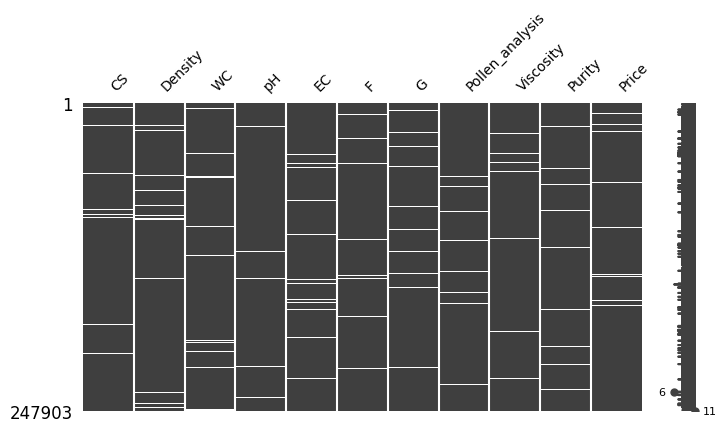

In [20]:
# Matrix visualization, eksik verilerin nerelerde olduğunu görmek için kullandım.
msno.matrix(honey_df_missing, figsize=(8, 4), fontsize=10)
plt.show()


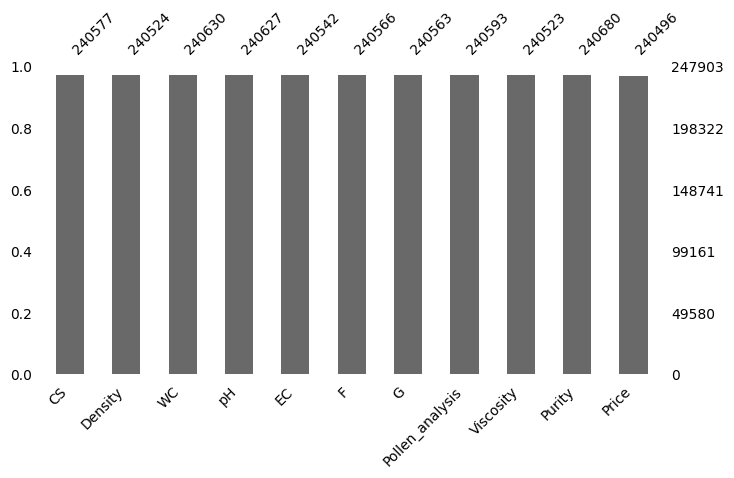

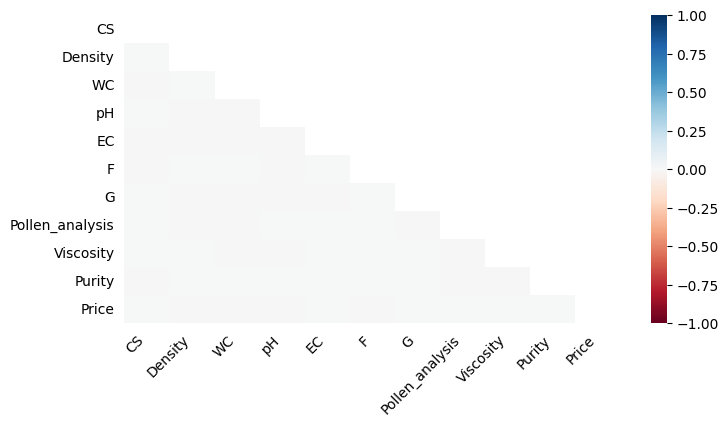

In [21]:
# Bar chart of missing data
msno.bar(honey_df_missing, figsize=(8, 4), fontsize=10)
plt.show()

# Heatmap to show correlation of missing data
msno.heatmap(honey_df_missing, figsize=(8, 4), fontsize=10)
plt.show()


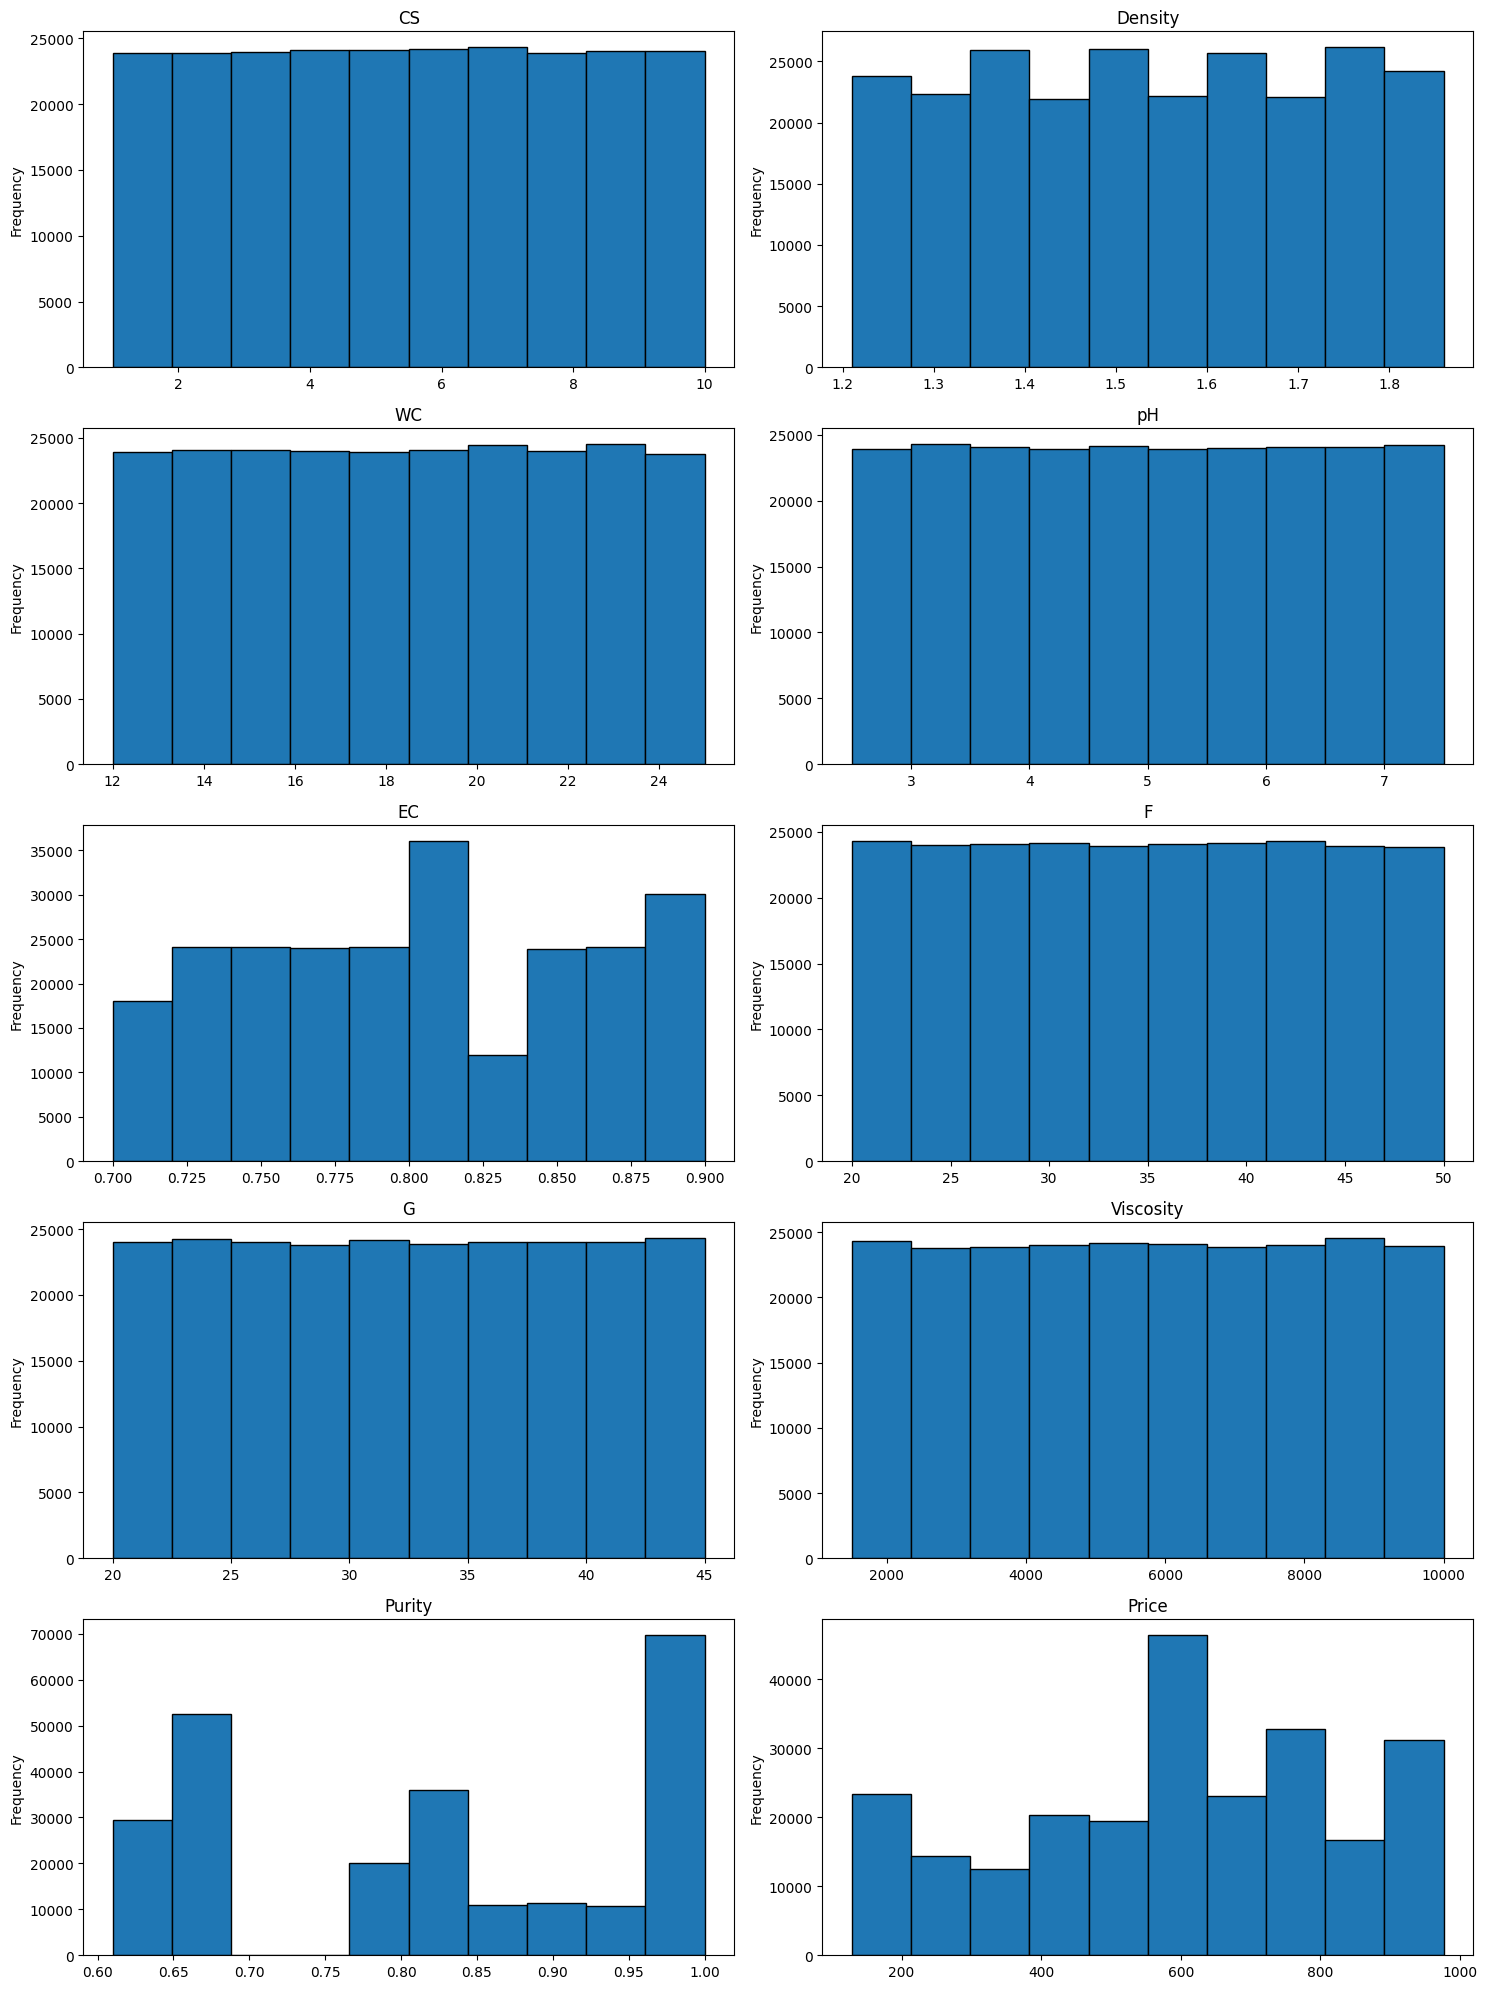

In [22]:
# "Pollen_analysis" kolonunu almıyorum kategorik olduğu için
plot_honey_df = honey_df_missing.drop(columns=["Pollen_analysis"])

columns = plot_honey_df.columns  # bütün kolon isimlerini almak için

# Subplot yaratmak için
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 5 rows, 2 columns (adjust grid as needed)

# Kolay dahil etmek için flatlıyorum axesleri
axes = axes.flatten()

# Bir sonraki grafiği yaratmak için loopa sokuyorum
for i, col in enumerate(columns):
      plot_honey_df[col].plot(
          kind='hist',
          edgecolor='black',
          ax=axes[i],
          title=col)

# Kullanılmayan axeslar varsa silmek için
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Değerlerimin fazla dalgalanma olmadan, minik farklılıklarla düzgün bir şekilde dağılıp dağılmadığını görmek için oluşturduğum bu grafiklerin sonucunda da ortalama değerler alarak eksik verilerimi doldurmanın daha verimli bir sonuca ulaştıracağını görmüş oldum.

# 3.2 Eksik verilerin doldurulması

Eksik verilerin doldurulması için ortalama seçeneğini tercih ettim çünkü genel olarak değerlerde dalgalanma gözlemlenmiyor.

 Kategorik olan sütunumu da mod ile doldurdum.

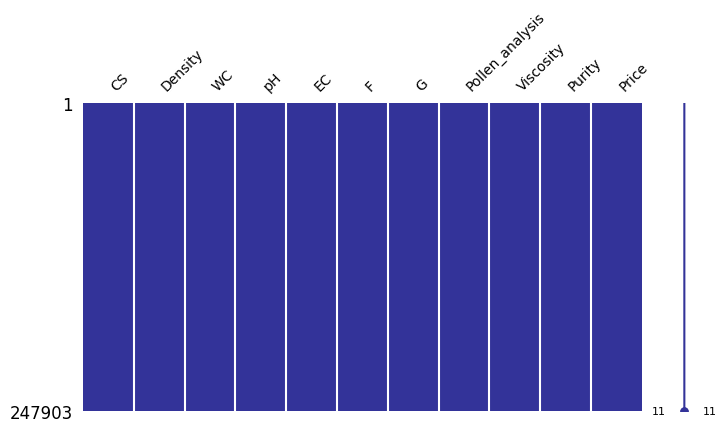

In [23]:
# Ortalama ile doldurmak için veri setinin kopyasını alıyoruz
mean_filled_df = honey_df_missing.copy()

# Sadece sayısal sütunları seç
numeric_columns = mean_filled_df.select_dtypes(include=['number']).columns

# Eksik değerleri sütunların ortalamaları ile dolduruyoruz, sadece sayısal sütunlar için
mean_filled_df[numeric_columns] = mean_filled_df[numeric_columns].fillna(mean_filled_df[numeric_columns].mean())

# Mod ile doldurma
categorical_column = "Pollen_analysis"
mean_filled_df[categorical_column] = mean_filled_df[categorical_column].fillna(mean_filled_df[categorical_column].mode()[0])

# Matrix visualization
msno.matrix(mean_filled_df, figsize=(8, 4), fontsize=10, color=[0.2, 0.2, 0.6])
plt.show()

Matrix'te de gördülüğü üzere boş değerler görünmüyor ama bir de sayısal olarak kontrol edelim.

In [24]:
#Ortalama değer ile doldurduğum değerlerimi bir de sayısal olarak kontrol ediyorum.
mean_filled_df.isna().sum()

,0
CS,0
Density,0
WC,0
pH,0
EC,0
F,0
G,0
Pollen_analysis,0
Viscosity,0
Purity,0


# 4.  Exploratory Data Analysis (EDA)

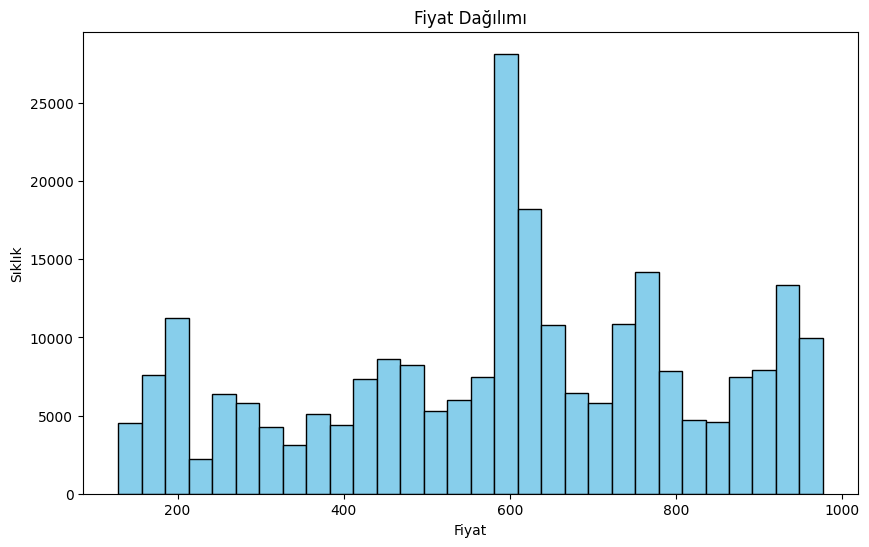

In [44]:
# Histogram for 'Price' variable
plt.figure(figsize=(10, 6))
plt.hist(mean_filled_df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Sıklık')
plt.show()

Genel olarak ilk bakmak istediğim grafik Price(Fiyat) kategorisinin genel olarak dağılımını, sıklığını içeren grafik oldu. Grafik yorumlanacak olursa, basit olarak ortalama olarak 600 birimlik fiyata sahip ürünlerde bir yığılma mevcuttur. 600-1000 aralığındaki ürün sayısının da genel olarak fazla olduğu gözlemleniyor. Balların çoğunlukla pahalı olduğunu söyleyebiliriz, bu yorum gelecekte daha detaylı olarak saflık, viskozite ve polen sınıfı olarak ayrılarak incelenecektir.

<ipython-input-48-9b1e1357136a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


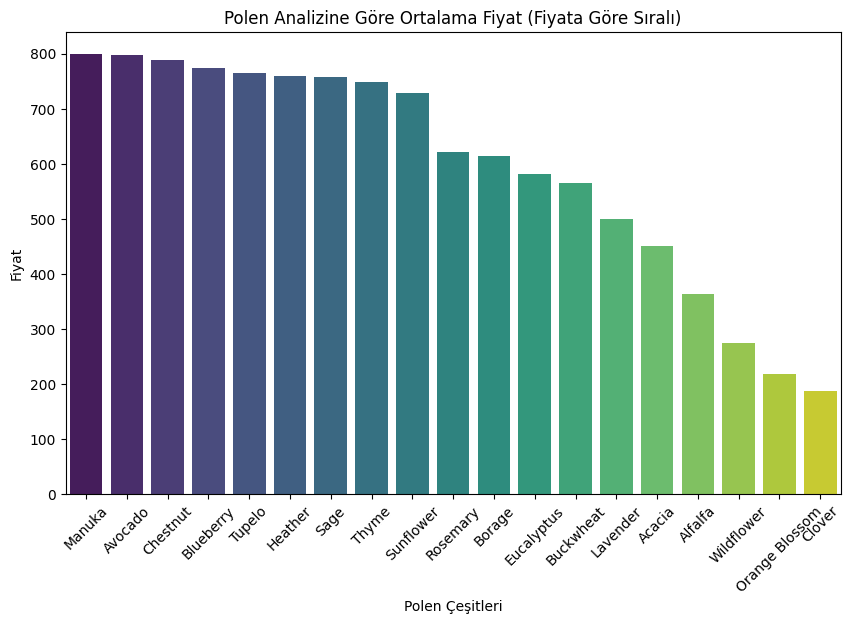

In [48]:
# Ortalama Price değerlerini kategorilere göre hesapla ve sıralı hale getir
data = mean_filled_df
avg_price_per_category = data.groupby('Pollen_analysis')['Price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.sort_values(by='Price', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Pollen_analysis',
    y='Price',
    data=avg_price_per_category,
    palette='viridis',
    order=avg_price_per_category['Pollen_analysis']
)
plt.title('Polen Analizine Göre Ortalama Fiyat (Fiyata Göre Sıralı)' )
plt.xticks(rotation=45)
plt.xlabel('Polen Çeşitleri')
plt.ylabel('Fiyat')
plt.show()

Fiyat ve Polen türleri arasındaki ilişkiyi incelersek, 18 türden 9 tanesinin 700 birimden fazla fiyata sahip olduğunu görürüz. En yüksek fiyatlı polen ise Manuka polenidir. Ortalama fiyat olan 400'ün altında 4 polen türü bulunuyor bunlar Alfafa, Wildflower, Orange Blossom ve Clover'dır.

<ipython-input-49-f9bc55a50f1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Pollen_analysis', x='Purity', data=avg_purity_per_pollen, palette= "mako")


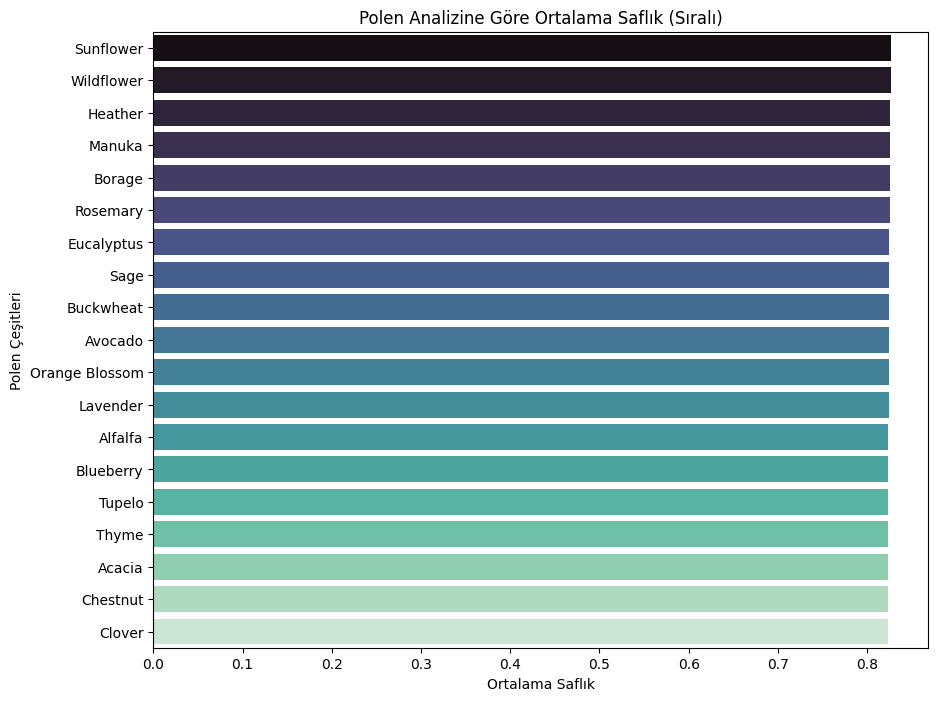

In [49]:
# Yatay bar plot
avg_purity_per_pollen = data.groupby('Pollen_analysis')['Purity'].mean().reset_index()
avg_purity_per_pollen = avg_purity_per_pollen.sort_values(by='Purity', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(y='Pollen_analysis', x='Purity', data=avg_purity_per_pollen, palette= "mako")
plt.title('Polen Çeşitlerine Göre Ortalama Saflık (Sıralı)')
plt.ylabel('Polen Çeşitleri')
plt.xlabel('Ortalama Saflık')
plt.show()

Genel olarak Saflık ve Polen türleri arasındaki ilişkiyi inceleyecek olursak bütün değerlerin birbirine fazlasıyla yakın olduğu görülür ve  detaylı bir açıklama yapmak için bu grafiğin daha dar bir aralığa sahip halini aşağıda inceleyeceğim.

<ipython-input-50-2ac5abc34e02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pollen_analysis', y='Purity', data=avg_purity_per_pollen, palette="rocket")


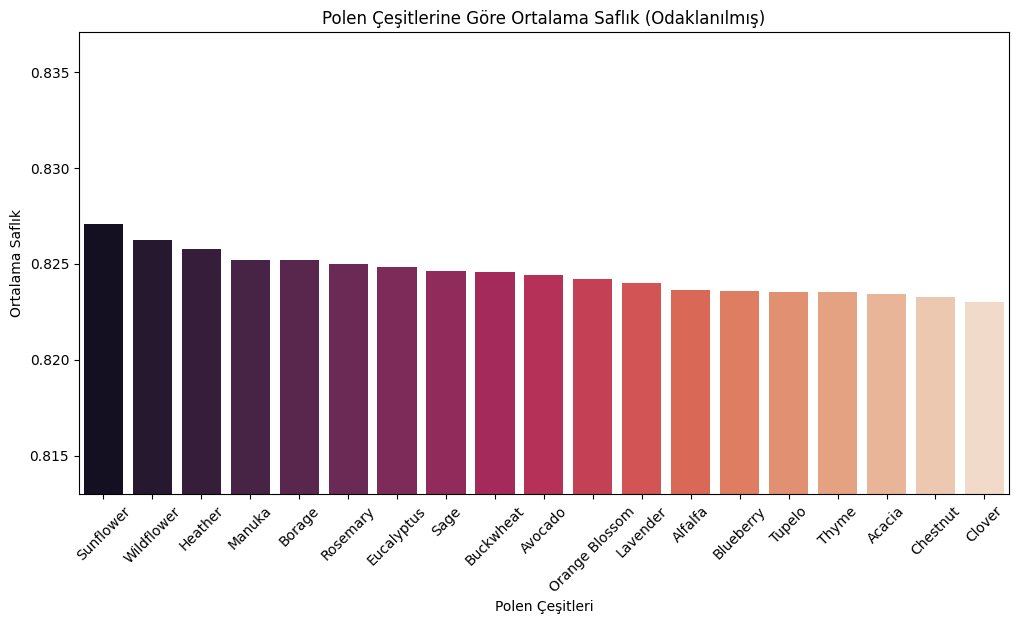

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pollen_analysis', y='Purity', data=avg_purity_per_pollen, palette="rocket")

# Y eksenini odaklamak için sınırları daraltma
plt.ylim(avg_purity_per_pollen['Purity'].min() - 0.01, avg_purity_per_pollen['Purity'].max() + 0.01)

plt.title('Polen Çeşitlerine Göre Ortalama Saflık (Odaklanılmış)')
plt.xlabel('Polen Çeşitleri')
plt.ylabel('Ortalama Saflık')
plt.xticks(rotation=45)
plt.show()

Değerleri daha detaylı görebildiğimiz bu grafikte "Sunflower", "Heather", "Wildflower" polenlerinden elde edilen balın saflığının diğer ballara göre daha fazla olduğu görülebilir ama başta da belirttiğim gibi değerler arasında büyük bir fark bulunmamakta.

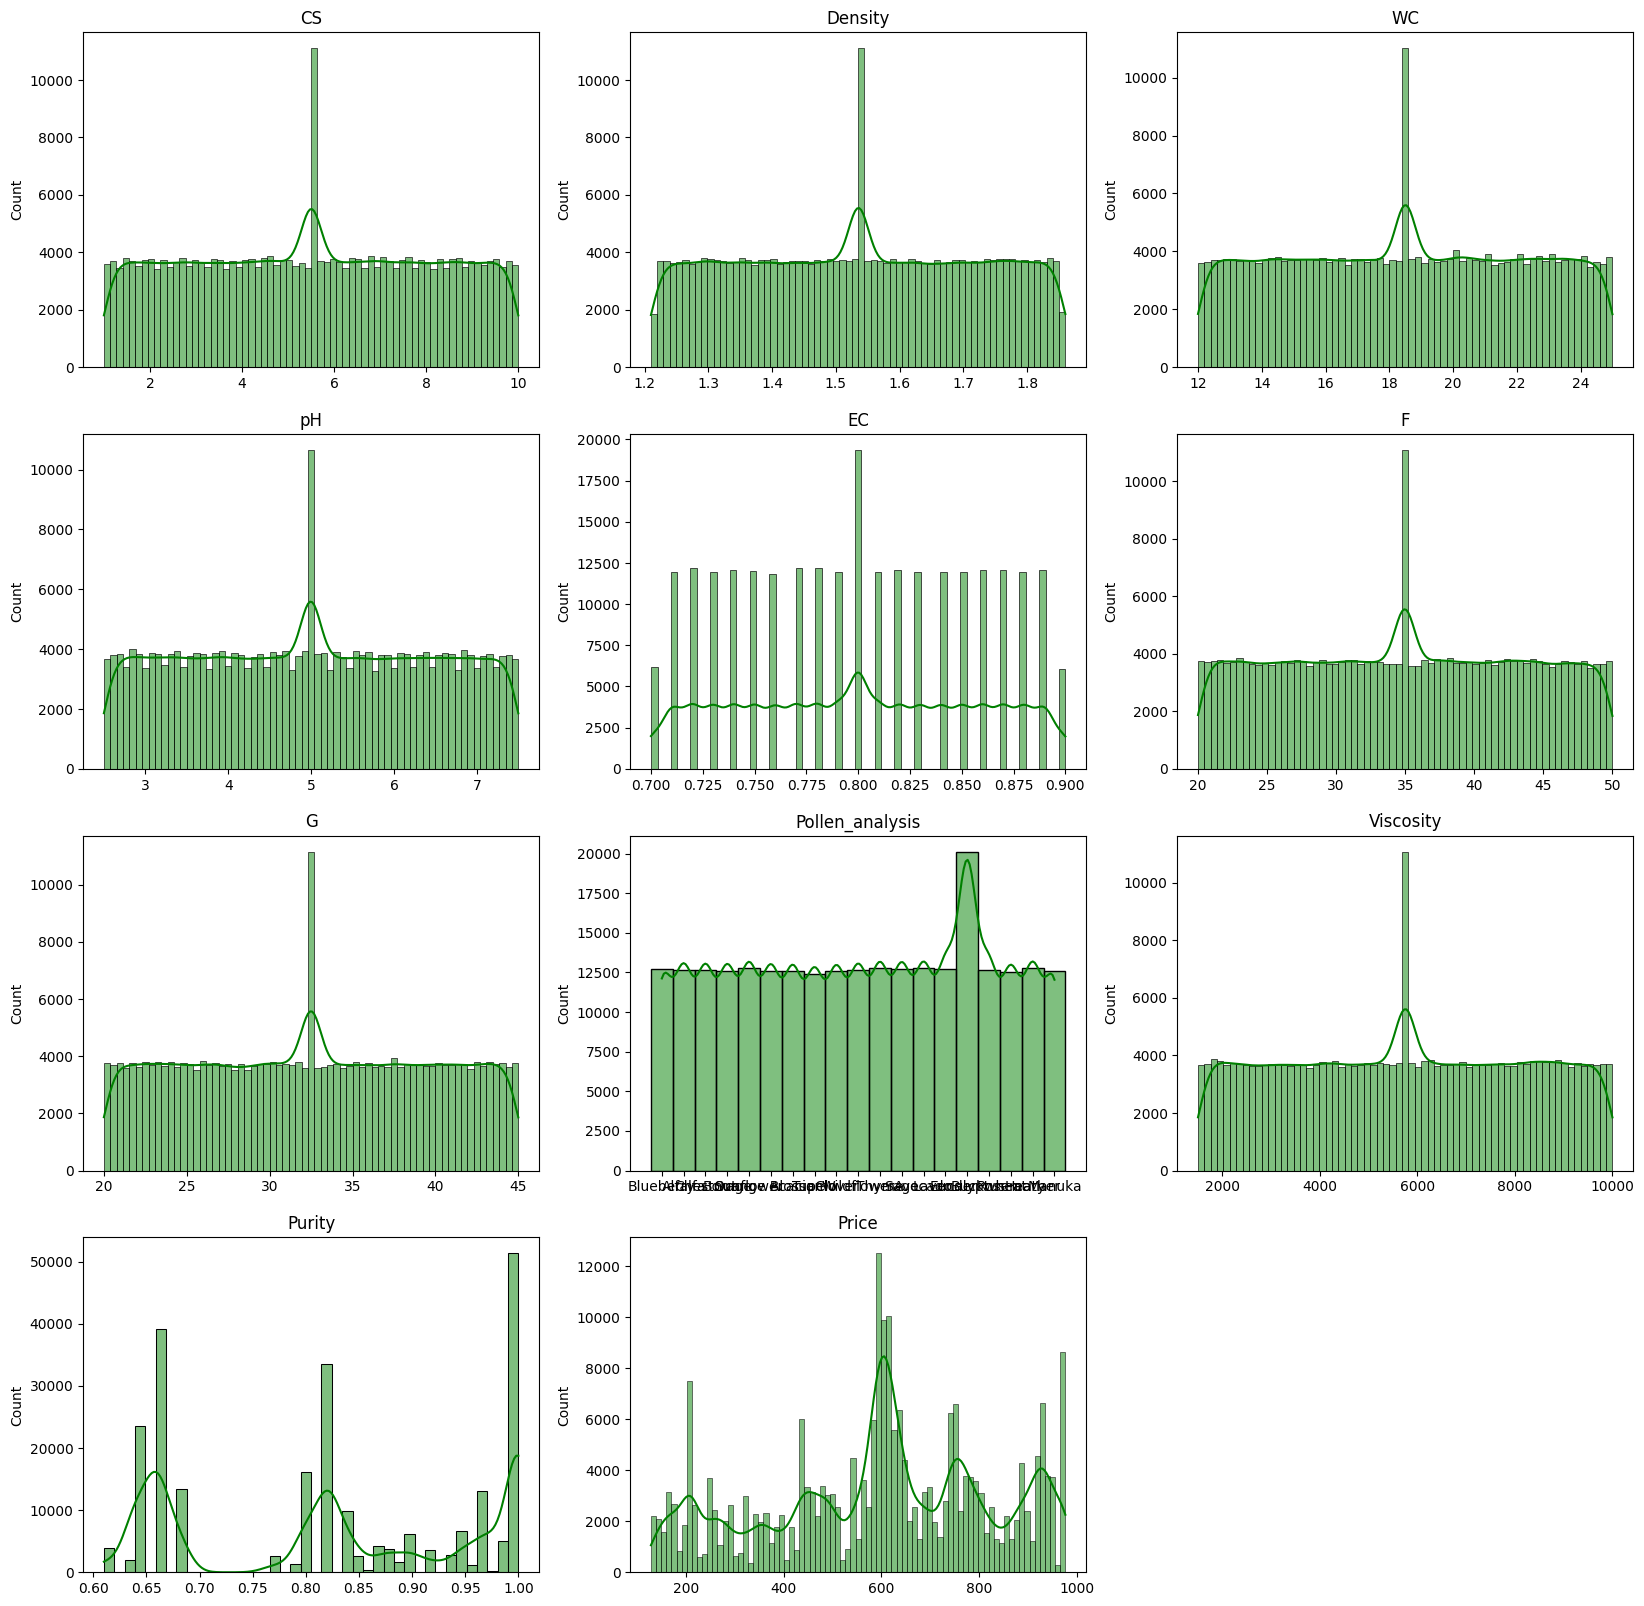

In [29]:
#Histogram
plt.figure(figsize=(20, 20))
ind=1
columns = mean_filled_df.columns
for  variable in (columns):
    plt.subplot(4,3, ind)
    sns.histplot(x=mean_filled_df[variable],kde=True,color="green")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.show()

  * CS, Density, WC, pH, EC, G, F, Pollen_analysis, Viscosity gibi özelliklerin histogramlarında dikkat çekici bir şekilde simetrik ve merkezi bir yoğunlaşma var. Bu durum, bu özelliklerin normal dağılıma yakın olabileceğini gösterebilir.

  * Purity: Bu değişken daha farklı bir dağılıma sahip ve veriler belirli değerlerde yoğunlaşmış. 0.65, 0.82, 1.00 değerlerinde 3 farklı peak noktası vardır. Genel olarak verinin içinde 3 ayrı saflık derecesinde bal bulunduğu söylenebilir.
  
  * Price: Fiyat değişkeninde yüksek varyans gözlemleniyor. Dağılım, birkaç belirli değer olan 600 civarına yoğunlaşmış ve diğer alanlarda daha düşük yoğunluk gösteriyor.

<ipython-input-51-f33afab1bf3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=mean_filled_df, x='Pollen_analysis', y='Price', palette='Set3')


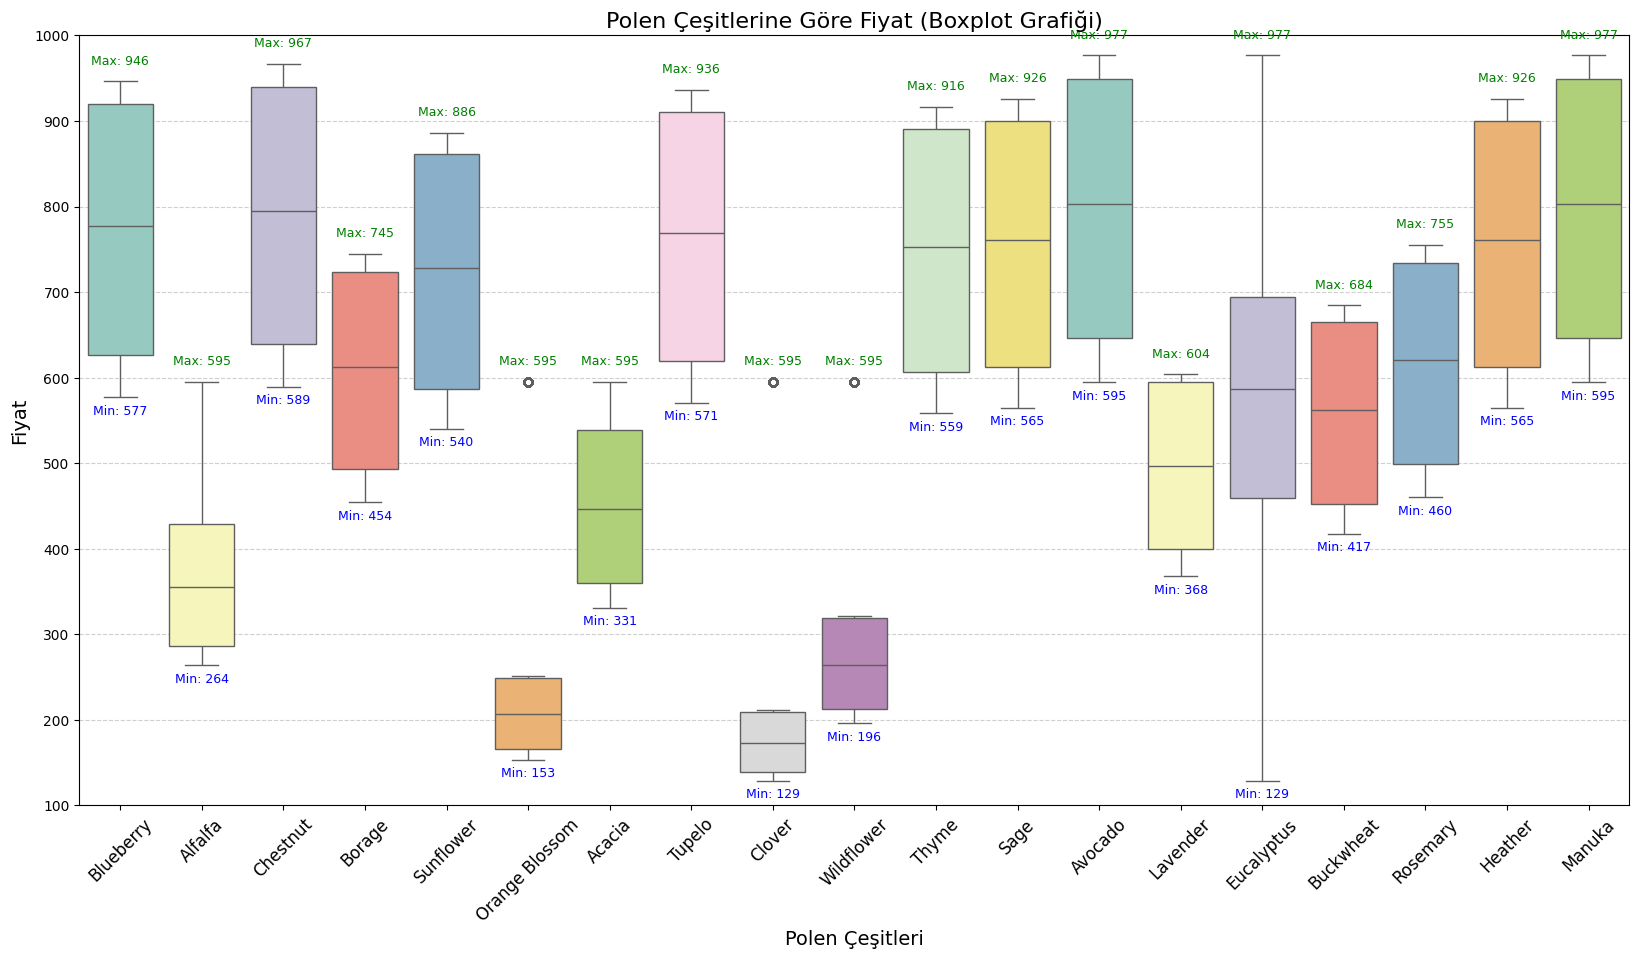

In [51]:
# Grafik boyutu
plt.figure(figsize=(20, 10))

# Boxplot için renk paleti belirleme
boxplot = sns.boxplot(data=mean_filled_df, x='Pollen_analysis', y='Price', palette='Set3')

# Her polen türü için minimum ve maksimum değerleri hesaplayıp ekleme
for i, pollen in enumerate(mean_filled_df['Pollen_analysis'].unique()):
    subset = mean_filled_df[mean_filled_df['Pollen_analysis'] == pollen]
    minimum = subset['Price'].min()
    maximum = subset['Price'].max()

    # Minimum ve maksimumu ekleme
    boxplot.text(i, minimum - 20, f'Min: {minimum:.0f}', color='blue', ha='center', fontsize=9)
    boxplot.text(i, maximum + 20, f'Max: {maximum:.0f}', color='green', ha='center', fontsize=9)

# Y ekseni aralığını daraltma (örnek olarak fiyat 100 ile 1000 arasında)
plt.ylim(100, 1000)

# Logaritmik eksen dönüşümü (isteğe bağlı, yorumdan çıkarabilirsin)
# plt.yscale('log')

plt.title('Polen Çeşitlerine Göre Fiyat (Boxplot Grafiği)', fontsize=16)
plt.xlabel('Polen Çeşitleri', fontsize=14)
plt.ylabel('Fiyat', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Daha iyi görünürlük için yatay çizgiler
plt.show()

* Fiyat Aralıkları: Her bir polen türü için fiyatlar arasında önemli farklılıklar bulunmaktadır.
Bazı polen türleri dar bir fiyat aralığına sıkışırken (ör. Clover, Orange Blossom), diğerlerinde geniş bir dağılım vardır (ör. Eucalyptus, Heather).

* Outlier (Aykırı Değerler): Kutu grafiklerinde birkaç polen türünde fiyat aralıklarının dışında kalan değerler gözlemlenmektedir (ör. Orange Blossom, Wildflower, Clover ). Bu durum, pazardaki nadir ya da olağan dışı fiyatları gösterebilir.

* Genel Fiyat Trendleri: Premium olarak bilinen polen türleri (ör. Manuka, Heather, Avocado) genel olarak daha yüksek fiyat segmentlerinde konumlanmıştır.
Daha düşük fiyatlı polen türleri arasında Clover, Orange Blossom, ve Wildflower bulunmaktadır.

* Pazar Segmentasyonu: Bu grafik, her polen türünün farklı bir fiyat segmentine hitap ettiğini göstermektedir. Örneğin:


  Premium Segment: Manuka, Heather, Avocado.

  Orta Segment: Eucalyptus, Blueberry.

  Düşük Segment: Orange Blossom, Wildflower.


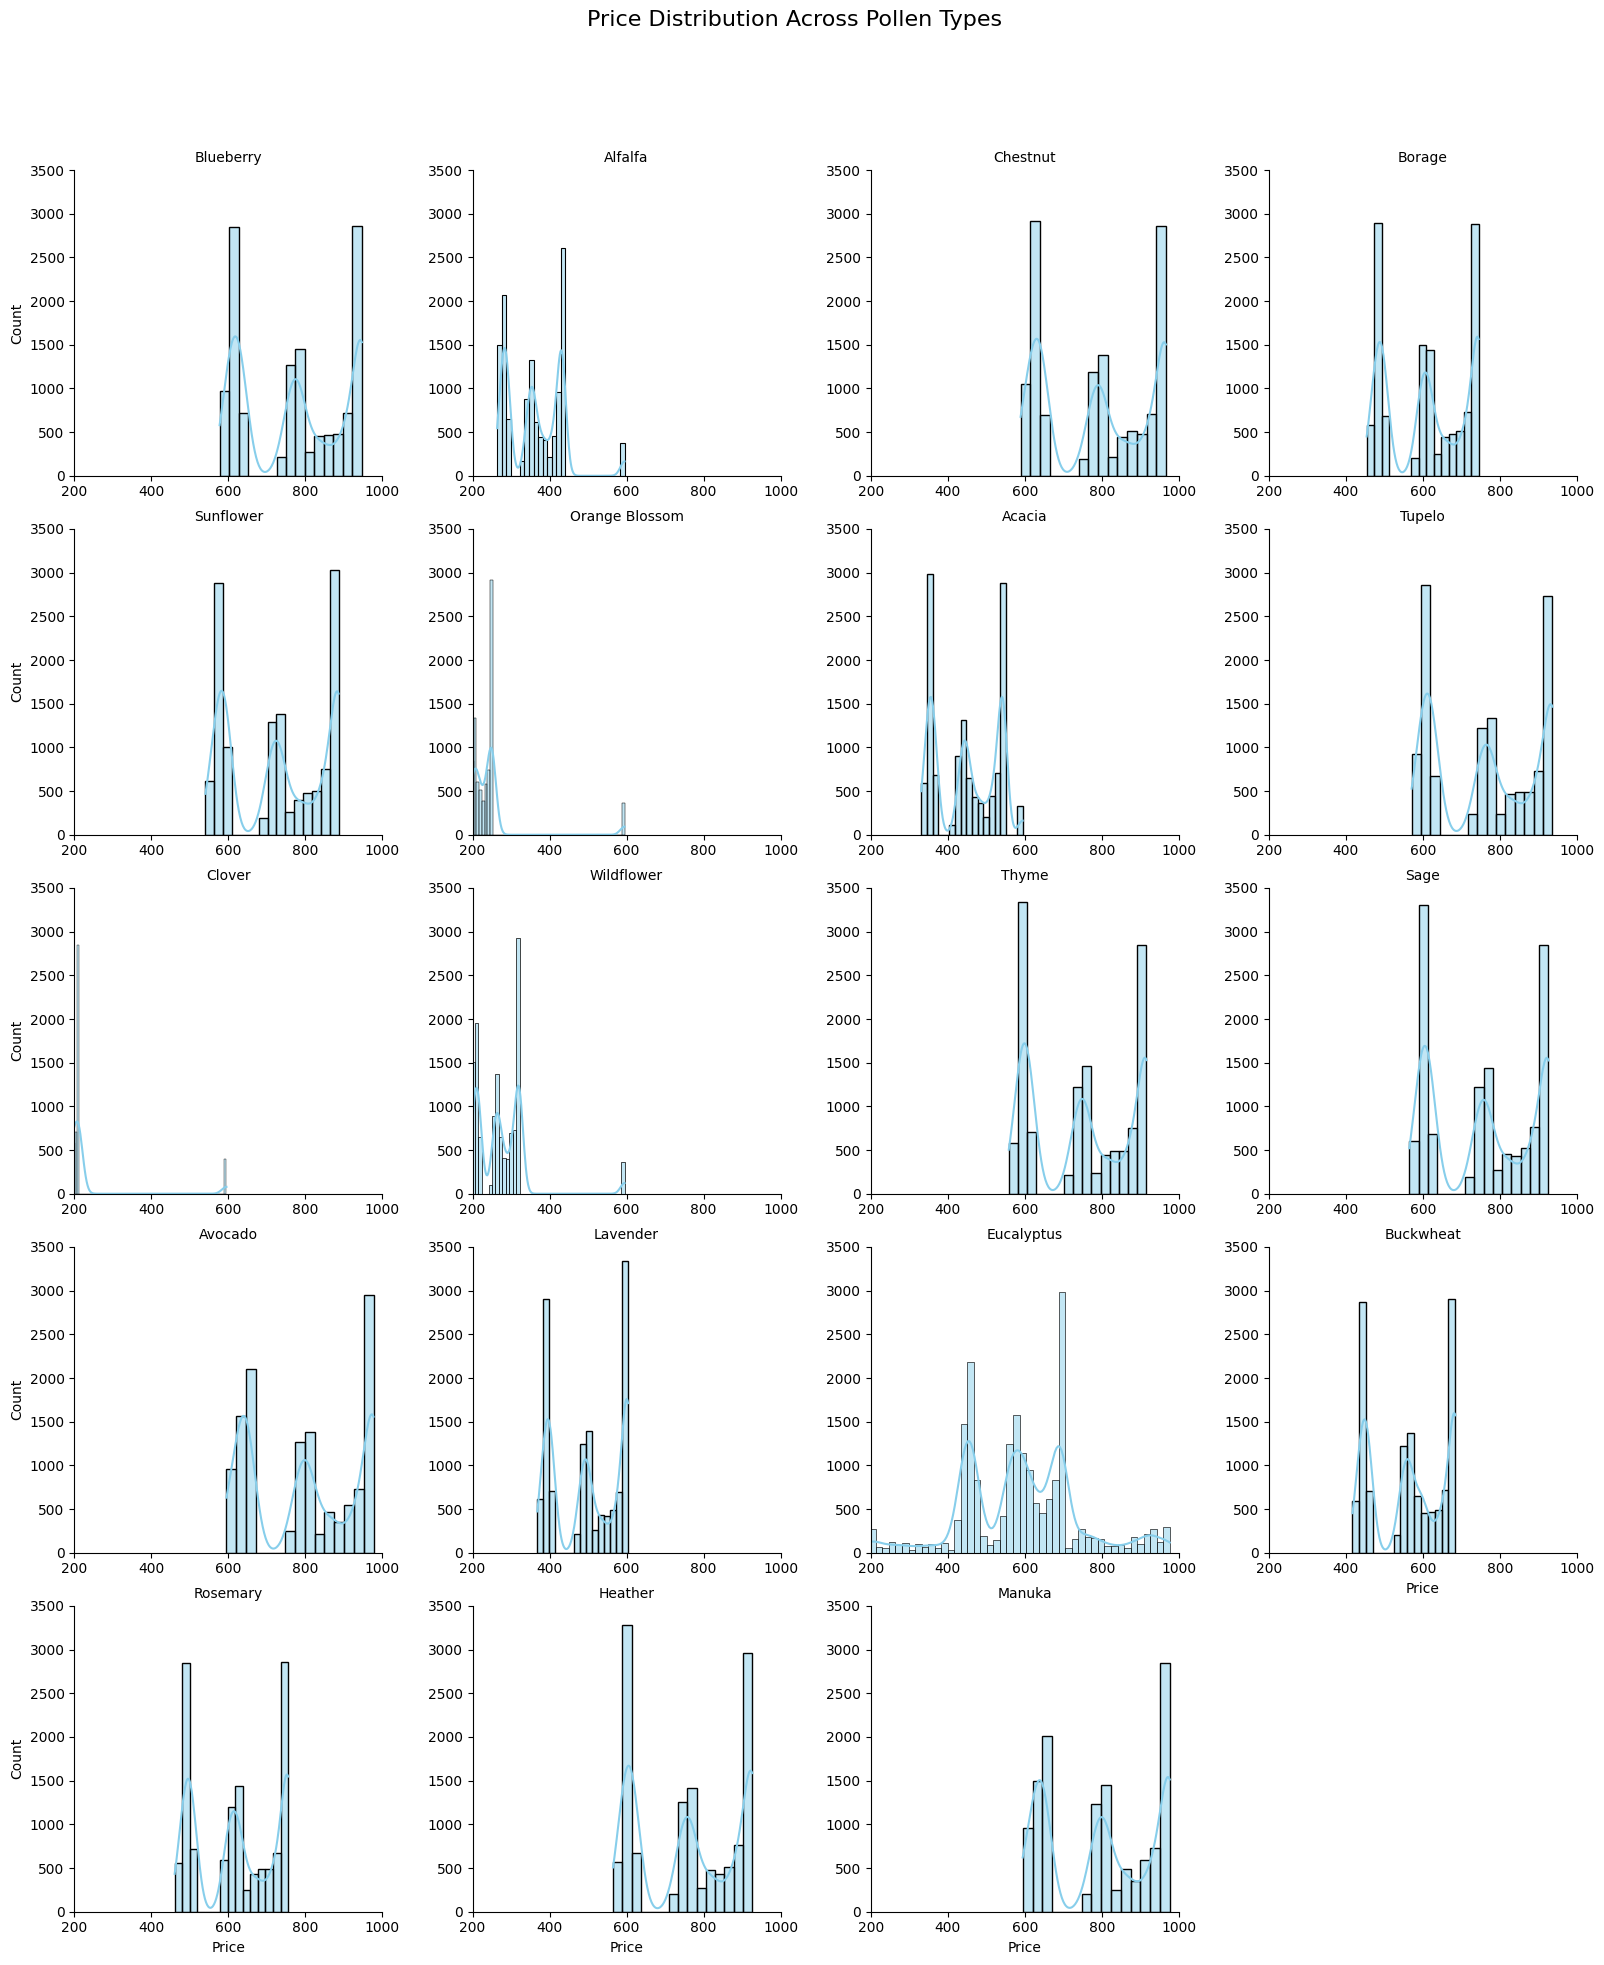

In [42]:
# FacetGrid with price distribution across pollen types
g = sns.FacetGrid(data, col='Pollen_analysis', col_wrap=4, height=4, sharex=False, sharey=False)  # Disable shared axes
g.map(sns.histplot, 'Price', kde=True, color='skyblue')

# Set x and y axis limits and ticks for each subplot
for ax in g.axes.flat:
    ax.set_xlim(200, 1000)  # X-axis limits
    ax.set_ylim(0, 3500)    # Y-axis limits
    ax.set_xticks(range(200, 1100, 200))  # X-axis ticks
    ax.set_yticks(range(0, 4000, 500))   # Y-axis ticks

# Titles and overall figure adjustments
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)  # Adjust spacing for the title
g.fig.suptitle('Price Distribution Across Pollen Types', fontsize=16)

# General axis labels
g.set_axis_labels("Price", "Count")

# Display the plot
plt.show()

* Blueberry: Fiyatlar 600-1000 aralığında yoğunlaşmıştır, ~600 ve ~900 civarında iki tepe noktası bulunmaktadır.

* Alfalfa: Fiyatlar 200-600 arasında yoğunlaşmıştır, ~400 civarında tek bir tepe noktası bulunmaktadır.

* Chestnut: Fiyatlar 600-1000 arasında yayılmıştır, ~600 ve ~900 civarında iki tepe noktası bulunmaktadır. Bu durum, orta fiyatlı ve premium segmenti işaret ediyor olabilir.

* Borage: Fiyatlar 400-800 arasında yoğunlaşmıştır, ~450 ve ~700 civarında iki tepe noktası bulunmaktadır.

* Sunflower: Fiyatlar 600-1000 arasında yoğunlaşmış, ~600 ve ~900 civarında iki belirgin tepe noktası bulunmaktadır. Bu durum, orta fiyatlı ve premium segmenti işaret ediyor olabilir.

* Orange Blossom: Fiyatlar 200-300 aralığında yoğunlaşmıştır, ~250 civarında tek bir tepe noktası bulunmaktadır.

* Acacia: Fiyatlar 400-600 arasında yoğunlaşmıştır, ~450 ve ~550 civarında iki tepe noktası bulunmaktadır.

* Tupelo: Fiyatlar 600-1000 arasında yoğunlaşmıştır, ~600 ve ~900 civarında iki tepe noktası bulunmaktadır. Bu durum, orta fiyatlı ve premium segmenti işaret ediyor olabilir.

* Avocado: Fiyatlar 600-1000 aralığında yoğunlaşmış, ~700 ve ~900 civarında iki tepe noktası bulunmaktadır. Bu durum, orta fiyatlı ve premium segmenti işaret ediyor olabilir.

* Lavender: Fiyatlar 400-600 aralığında yoğunlaşmış, ~450 ve ~550 civarında iki tepe noktası bulunmaktadır.

* Eucalyptus: Fiyatlar 200-800 arasında geniş bir dağılıma sahiptir ve ~400 ile ~600 civarında iki tepe noktası bulunmaktadır.

* Buckwheat: Fiyatlar 400-600 aralığında yoğunlaşmış, ~450 ve ~550 civarında iki tepe noktası bulunmaktadır.

* Rosemary: Fiyatlar 400-800 arasında yoğunlaşmış, ~500 ve ~700 civarında iki belirgin tepe noktası bulunmaktadır.

* Heather: Fiyatlar 600-1000 arasında yoğunlaşmış, ~600 ve ~900 civarında iki belirgin tepe noktası bulunmaktadır.Bu durum, orta fiyatlı ve premium segmenti işaret ediyor olabilir.

* Manuka: Fiyatlar 600-1000 aralığında yoğunlaşmış, ~700 ve ~900 civarında iki tepe noktası bulunmaktadır. Bu durum, orta fiyatlı ve premium segmenti işaret ediyor olabilir.

-


* Öne Çıkan Bulgular:

Orange Blossom, Wildflower ve Clover polenleri tek tepe noktalı yapısına sahip olduğu için diğerlerinden ayrılan bir yapıya sahiptir.

Manuka, Heather, Avocado polenlerinden üretilen ballar genel olarak daha pahalı olma eğilimdedir.

Eucalyptus, fiyat değişkenliğinin en yüksek olduğu türdür ve çok farklı kalite seviyelerine veya farklı segmentlere işaret ediyor.

Genel olarak çoğu polen türü (~600 ve ~900) fiyat aralığında yoğunlaşarak iki ayrı tepe noktası oluşturur. Bu durum, farklı kalite seviyelerini veya farklı segmentleri işaret ediyor olabilir.

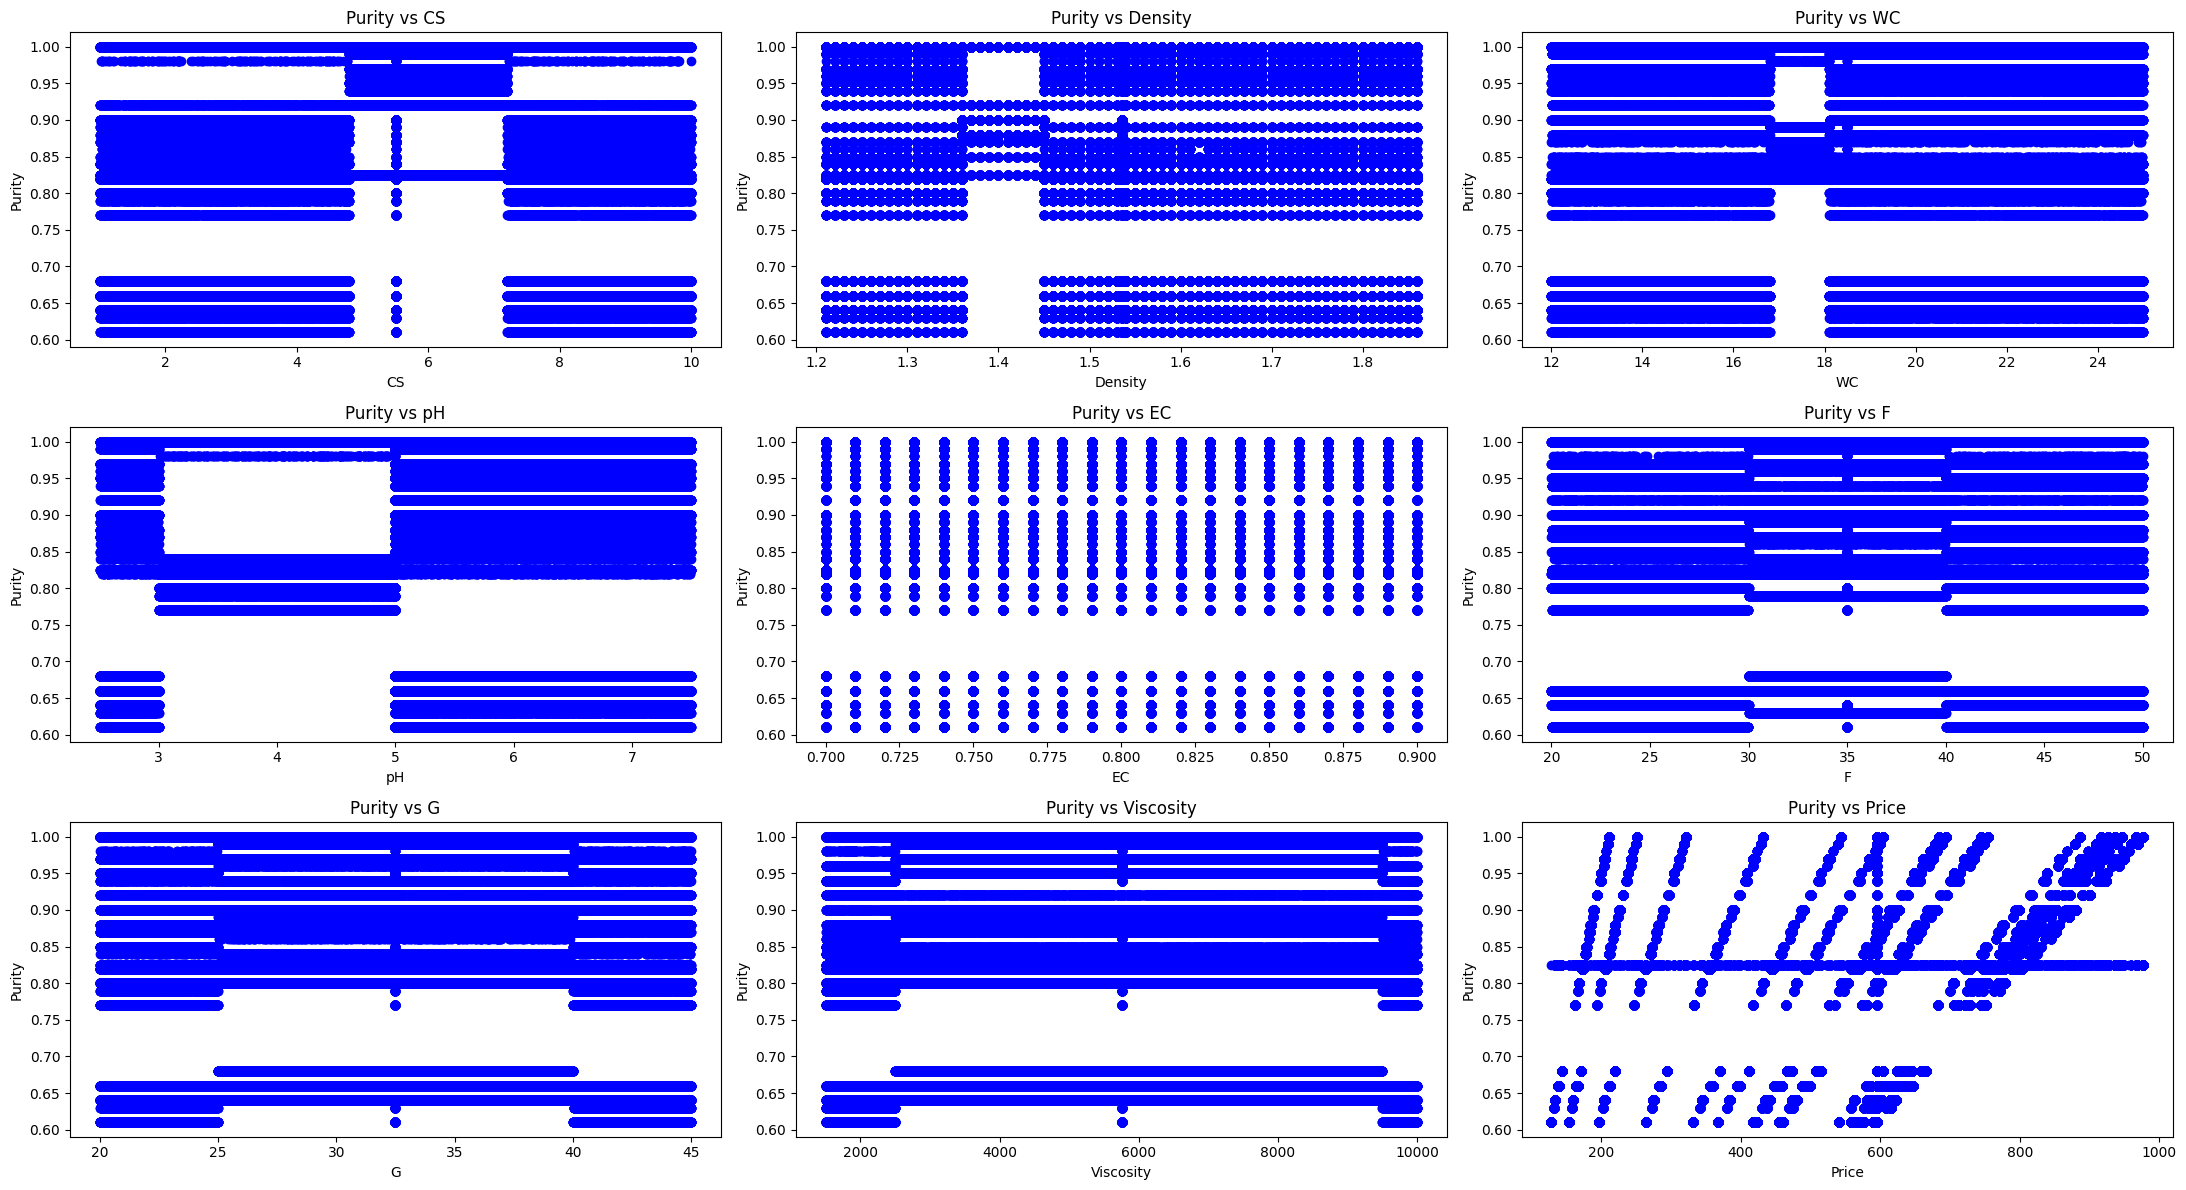

In [32]:
#Scatter plot
plt.figure(figsize=(22, 12))
ind=1
for variable in (['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Viscosity','Price']):
    plt.subplot(3,3, ind)
    plt.scatter(mean_filled_df[variable],mean_filled_df["Purity"],color="blue")
    plt.title(f"Purity vs {variable}")
    ind+=1
    plt.xlabel(variable)
    plt.ylabel("Purity")
plt.tight_layout()
plt.show()

* Purity vs CS (Color Score):
Purity genelde sabit değerlerde (örneğin, 0.80, 0.90 ve 1.00) yoğunlaşmıştır.
Düşük CS (1-5) değerlerinde Purity daha geniş bir dağılım gösterirken, yüksek CS değerlerinde (~7-10) 0.80 ile 1.00 arasında yoğunlaşma görülmektedir. Color Score, Purity üzerinde doğrudan bir değişim yaratmamaktadır.

* Purity vs Density: Purity, 0.60 ile 1.00 arasında sabit kümeler oluşturmuştur.Özellikle 0.80, 0.85, 0.90 ve 1.00 değerlerinde yoğunlaşma gözlemlenmiştir.
Density (1.2-1.8) Purity üzerinde doğrudan bir etkide bulunmamış, 1,4 civarında kümelenme yoktur. Bunun dışında her yoğunlukta benzer kümelenmeler oluşmuştur.

* Purity vs W/C (Water Content): Purity değerleri sabit kümeler halinde 0.60 ile 1.00 arasında yoğunlaşmıştır. 0,7 değerinde küme bulunmamaktadır.
WC değerleri (12-24) değiştikçe Purity’de bir değişiklik gözlemlenmemiştir. WC'de 17 değerinde kümelenme görülmemektedir. Purity kısmında özellikle 0.85 ve 1.00 civarında yoğun kümelenme dikkat çekicidir.

* Purity vs pH: Purity değerleri 0.60 ile 1.00 arasında sabit kümeler oluşturmuştur. Özellikle 0.85 ve 0.90 noktalarında belirgin bir yoğunluk bulunmaktadır.
pH (3-7) değerleri Purity üzerinde anlamlı bir değişiklik yaratmamış. pH değeri 3-5 arasında iken Purity değeri 0.60 - 0.75 değerleri arasında olan, ayrıca 0.85 - 0.95 değerleri arasında hiçbir kümelenme oluşmamıştır.


* Purity vs EC (Electrical Conductivity): Purity, sabit değerler (örneğin, 0.80, 0.85, 0.90 ve 1.00) etrafında kümelenmiştir.
EC (0.700-0.900) değerlerinin Purity üzerinde doğrudan bir etkisi bulunmamaktadır. Farklı EC değerlerinde benzer sabit kümeler gözlenmiştir.


* Purity vs F (Fructose Level): Purity, Fructose değerine bağlı olmaksızın sabit kümeler halinde (0.80, 0.85, 0.90 ve 1.00) yoğunlaşmıştır.
F (20-50) değerlerinde Purity'nin düzenli bir değişim göstermediği ve belirgin bir ilişki bulunmadığı gözlenmiştir.


* Purity vs G (Glucose Level): Purity değerleri sabit kümeler halinde yoğunlaşmış, özellikle 0.80, 0.85, 0.90 ve 1.00 civarında yoğunluk göstermiştir.
G (20-45) değerleri Purity üzerinde belirgin bir değişim yaratmamış, Glucose sabit kümelenmelere yol açmıştır.


* Purity vs Viscosity: Purity, 0.60 ile 1.00 arasında sabit kümeler halinde yoğunlaşmıştır. Özellikle 0.85 ve üzerindeki değerlerde yoğunluk artmıştır.
Viskozite (1000-10000) değişimleri, Purity üzerinde belirgin bir etki yaratmamış, Purity sabit bir yapıda kalmıştır.


* Purity vs Price:Purity, düşük fiyatlarda (200-600) geniş bir dağılım gösterirken, yüksek fiyatlarda (600-1000) 0.85 ve üzeri değerlere odaklanmıştır.
Daha yüksek fiyatların genelde daha yüksek Purity seviyeleriyle ilişkilendirildiği gözlenmiştir.

Genel olarak datasetimde Purity değeri 0.70 ve 0.75 arasında olan değerler olmadığı için her grafikte benzer yapılanmalar oluşmuştur.


Grafikler çok anlaşılır olmadığı için elimden geldiği kadar yorumlamaya çalıştım :(

# 4.1 Manuka Balı Hakkında Ekstra Araştırma

Genel bir bilgi olarak Manuka balı fazlasıyla pahalı bir baldır. ( HepsiBurada'da 500 gramı 3.600 tl civarında satışı bulunmakta.) Bu balın pahalı olmasının nedeni Antibiyotik özelliğe sahip olması olarak gösterilir. Bir balın antibiyotik özellik göstermesi için belirli kategorileri karşılaması gerekmektedir.

*   Düşük Su İçeriği (WC)
*   Düşük pH Seviyesi
*   Yüksek Şeker Oranı( (fruktoz ve glikoz) dengesi)
*   Düşük Elektriksel İletkenlik (EC)


Gelecek grafiklerim (Label Encode'dan önceki kısım) Manuka balı hakkında bilinen bu bilginin doğruluğunun tespiti ve varsa eğer başka balların da antibiyotik özelliğinin Manuka balı kadar olup olmadığını tespit etmek üzere olacaktır.

<ipython-input-52-ad1775567bd3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_wc_per_pollen, x='Pollen_analysis', y='WC', palette='coolwarm')


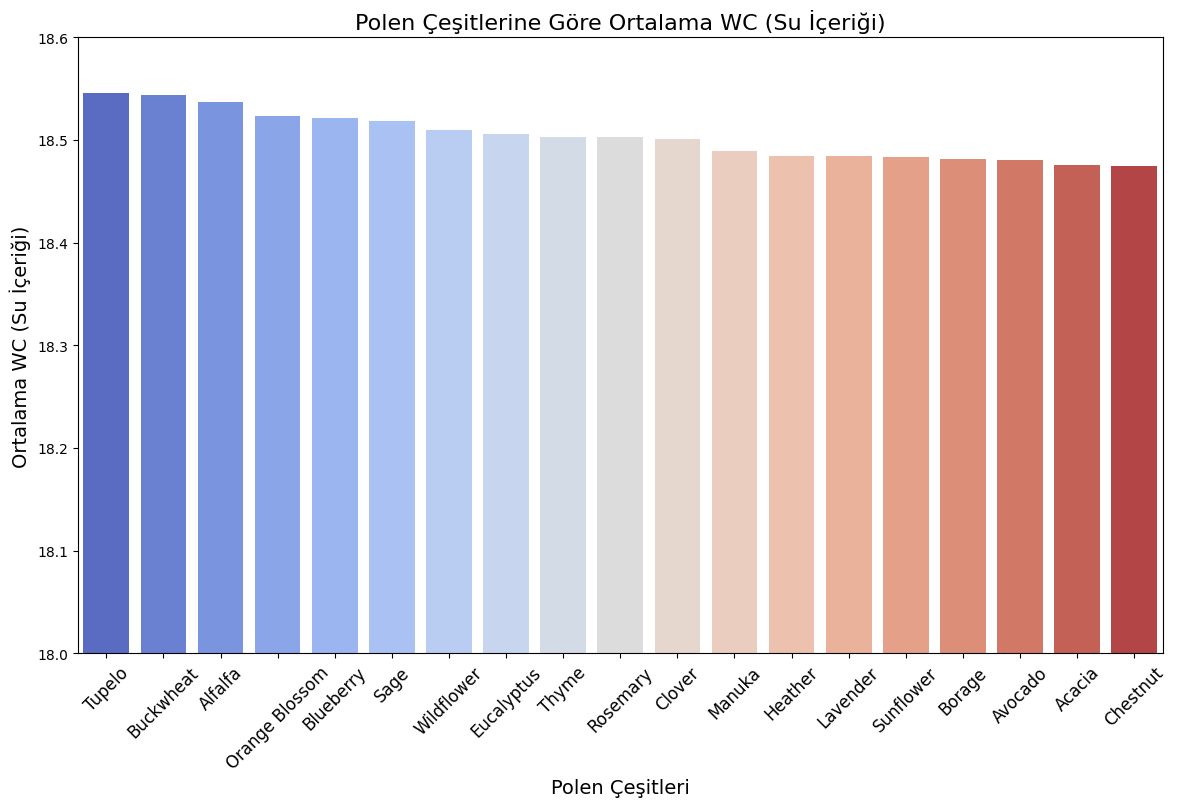

In [52]:
# Polen türlerine göre ortalama WC değerlerini hesaplamak
avg_wc_per_pollen = mean_filled_df.groupby('Pollen_analysis')['WC'].mean().reset_index()

# Polen türlerini WC değerine göre sıralamak
avg_wc_per_pollen = avg_wc_per_pollen.sort_values(by='WC', ascending=False)


# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_wc_per_pollen, x='Pollen_analysis', y='WC', palette='coolwarm')
# Y eksenini 18 ve 18.6 aralığına sınırla
plt.ylim(18, 18.6)

# Grafiğin başlığı ve eksen adları
plt.title('Polen Çeşitlerine Göre Ortalama WC (Su İçeriği)', fontsize=16)
plt.xlabel('Polen Çeşitleri', fontsize=14)
plt.ylabel('Ortalama WC (Su İçeriği)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Grafiği göster
plt.show()

<ipython-input-54-bf09ba742851>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_ph_by_pollen, x='Pollen_analysis', y='pH', palette='viridis')


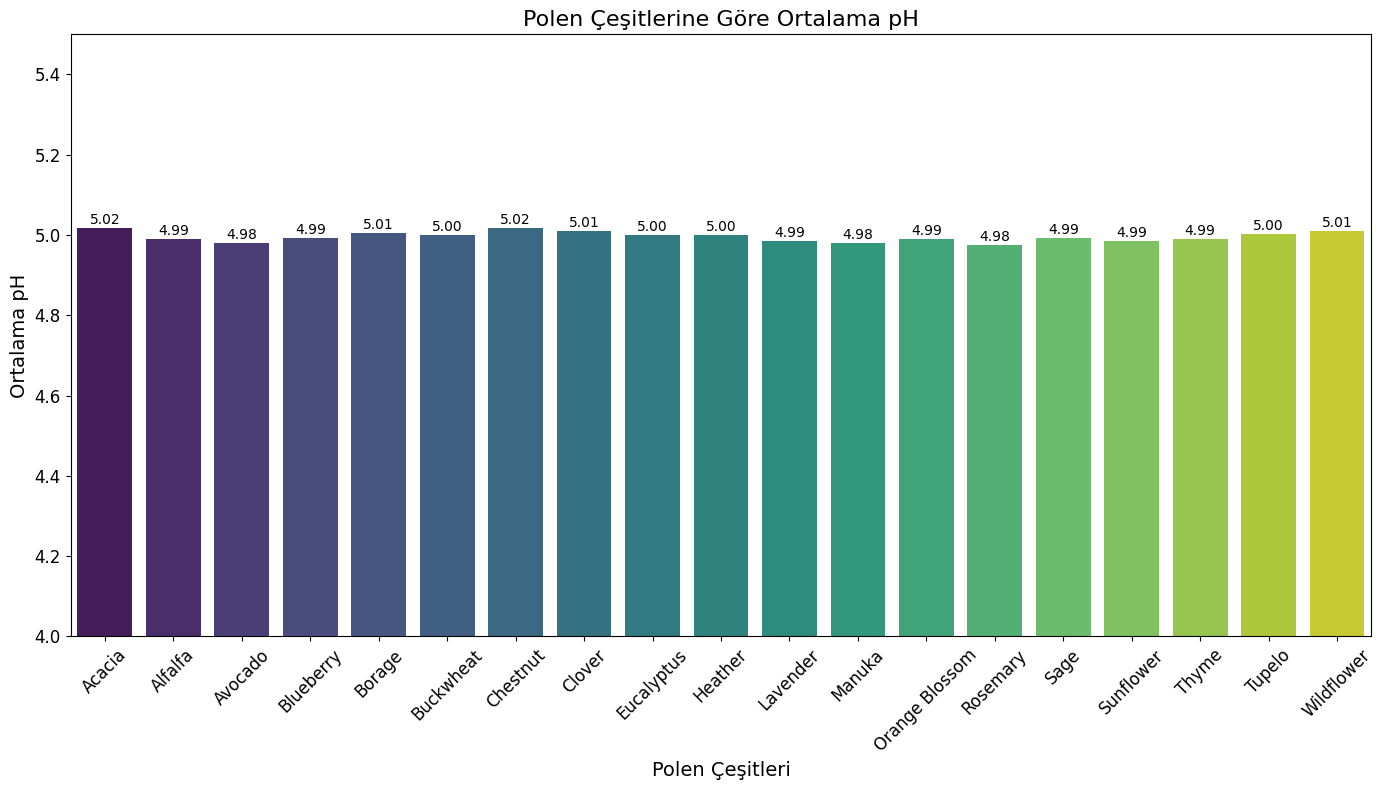

In [54]:
# Polen türlerine göre pH ortalamalarını hesaplama
mean_ph_by_pollen = data.groupby('Pollen_analysis')['pH'].mean().reset_index()

# Bar grafiği oluşturma
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_ph_by_pollen, x='Pollen_analysis', y='pH', palette='viridis')
# Y eksenini 4 ve 5.5 aralığına sınırla
plt.ylim(4, 5.5)

# Grafik başlık ve etiketleri
plt.title('Polen Çeşitlerine Göre Ortalama pH', fontsize=16)
plt.xlabel('Polen Çeşitleri', fontsize=14)
plt.ylabel('Ortalama pH', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ortalama değerlerin çubukların üzerine eklenmesi
for i, value in enumerate(mean_ph_by_pollen['pH']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Grafiği gösterme
plt.tight_layout()
plt.show()

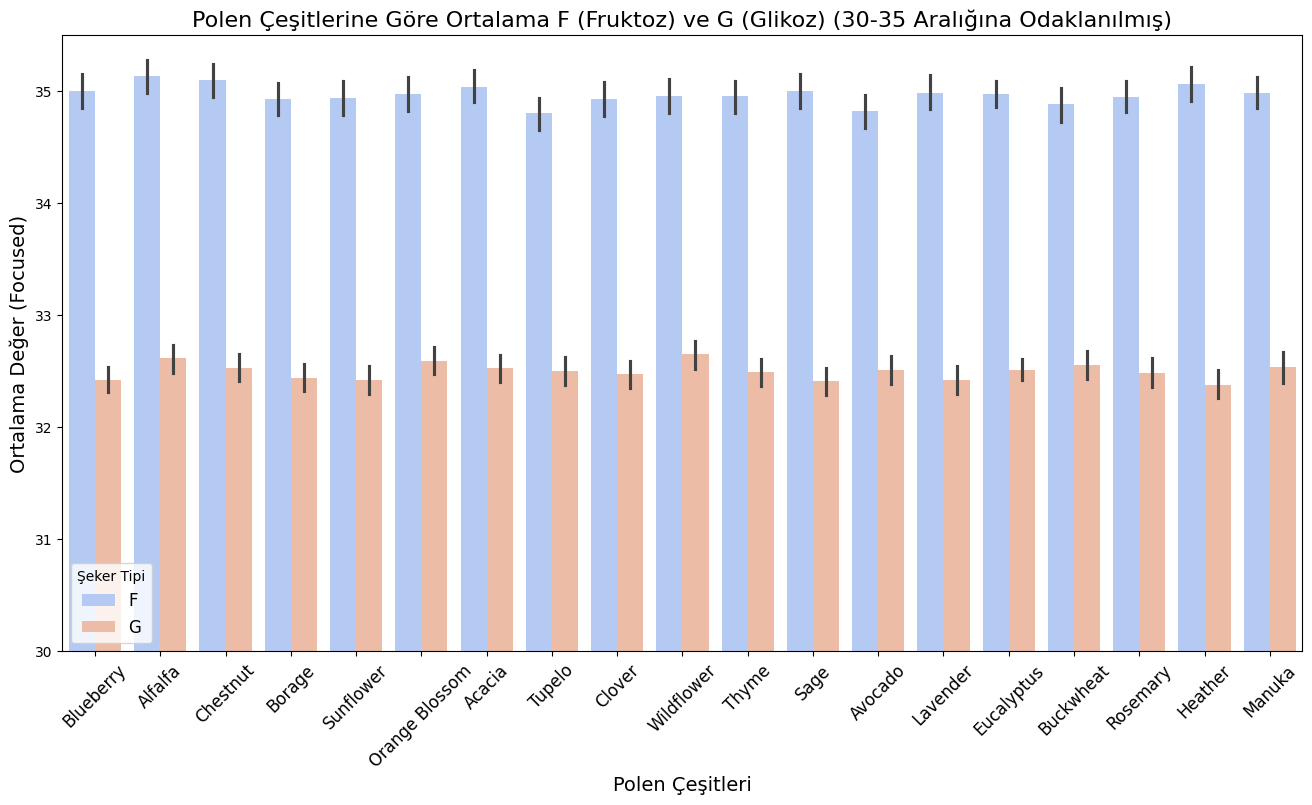

In [55]:
avg_fg_per_pollen_melted = mean_filled_df.melt(
    id_vars='Pollen_analysis',
    value_vars=['F', 'G'],
    var_name='Sugar Type',
    value_name='Value'
)

# Grafik oluşturma
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_fg_per_pollen_melted, x='Pollen_analysis', y='Value', hue='Sugar Type', palette='coolwarm')

# Y eksenini 30-35 aralığına sınırla
plt.ylim(30, 35.5)

# Grafiğin başlığı ve eksen adları
plt.title('Polen Çeşitlerine Göre Ortalama F (Fruktoz) ve G (Glikoz) (30-35 Aralığına Odaklanılmış)', fontsize=16)
plt.xlabel('Polen Çeşitleri', fontsize=14)
plt.ylabel('Ortalama Değer (Focused)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Şeker Tipi', fontsize=12)

# Grafiği göster
plt.show()

<ipython-input-56-3ebd529f0fbd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ec_per_pollen, x='Pollen_analysis', y='EC', palette='viridis')


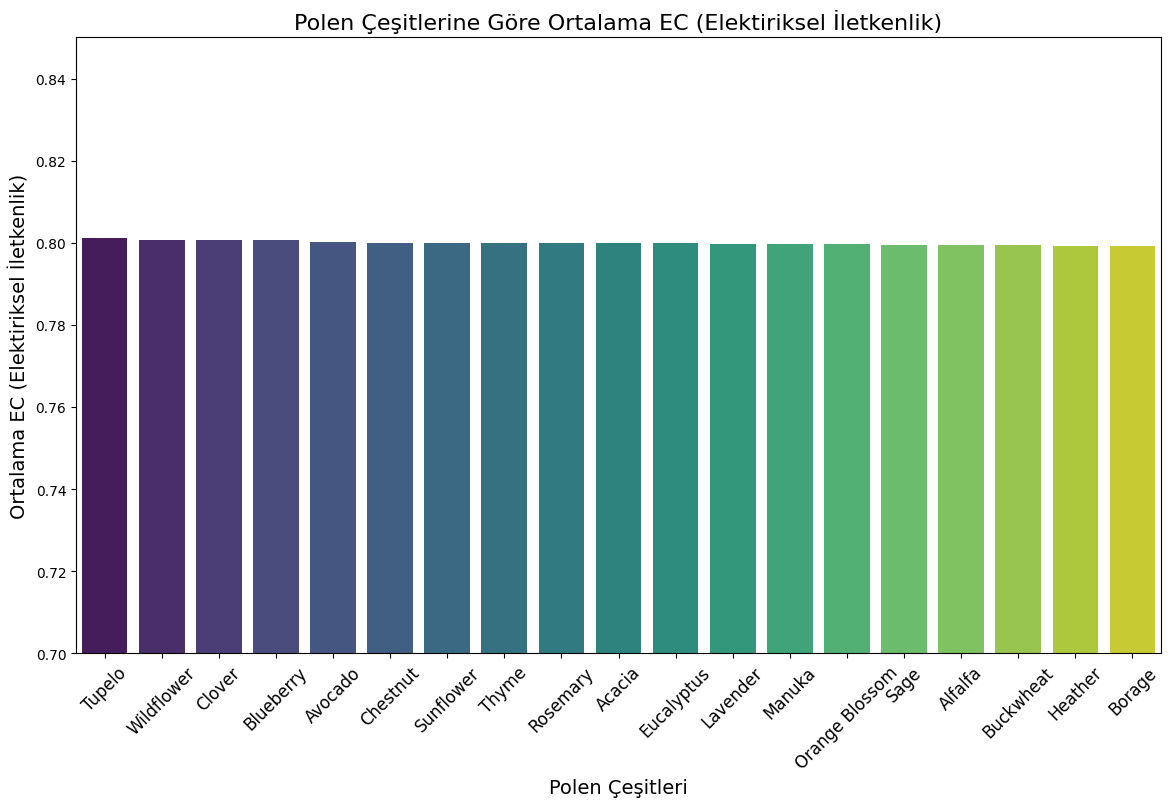

In [56]:
# Polen türlerine göre ortalama EC değerlerini hesapla
avg_ec_per_pollen = mean_filled_df.groupby('Pollen_analysis')['EC'].mean().reset_index()

# Polen türlerini EC değerine göre sıralama
avg_ec_per_pollen = avg_ec_per_pollen.sort_values(by='EC', ascending=False)

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_ec_per_pollen, x='Pollen_analysis', y='EC', palette='viridis')

# Y eksenini 0.7 ile 0.85 aralığına sınırla
plt.ylim(0.7, 0.85)

# Grafiğin başlığı ve eksen adları
plt.title('Polen Çeşitlerine Göre Ortalama EC (Elektiriksel İletkenlik)', fontsize=16)
plt.xlabel('Polen Çeşitleri', fontsize=14)
plt.ylabel('Ortalama EC (Elektiriksel İletkenlik)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Grafiği göster
plt.show()

Yukarıdaki maddeleri içeren 4 ayrı grafik yukarıda görülüyor. 4 grafikte de değerler birbirine fazlasıyla yakındır. Birbirlerinden ayrılan, göz önüne çıkan bir değer bulunmamakla birlikte Manuka balının Antibiyotiklik etkisini sağlayan değişken ya datasetimde yer almıyor ya da datasetinde bulunan herhangi bir bal da en az Manuka balı kadar antibiyotik özellik gösteriyor denilebilir.

In [37]:
# LabelEncoder nesnesi oluştur
label_encoder = LabelEncoder()

# Kategorik değişkenin adını seç
categorical_column = 'Pollen_analysis'

# Kategorik veriyi encode et
data[categorical_column + '_encoded'] = label_encoder.fit_transform(data[categorical_column])

# İlk 5 satırı kontrol et
print(data[[categorical_column, categorical_column + '_encoded']].head())

  Pollen_analysis  Pollen_analysis_encoded
0       Blueberry                        3
1         Alfalfa                        1
2        Chestnut                        6
3       Blueberry                        3
4         Alfalfa                        1


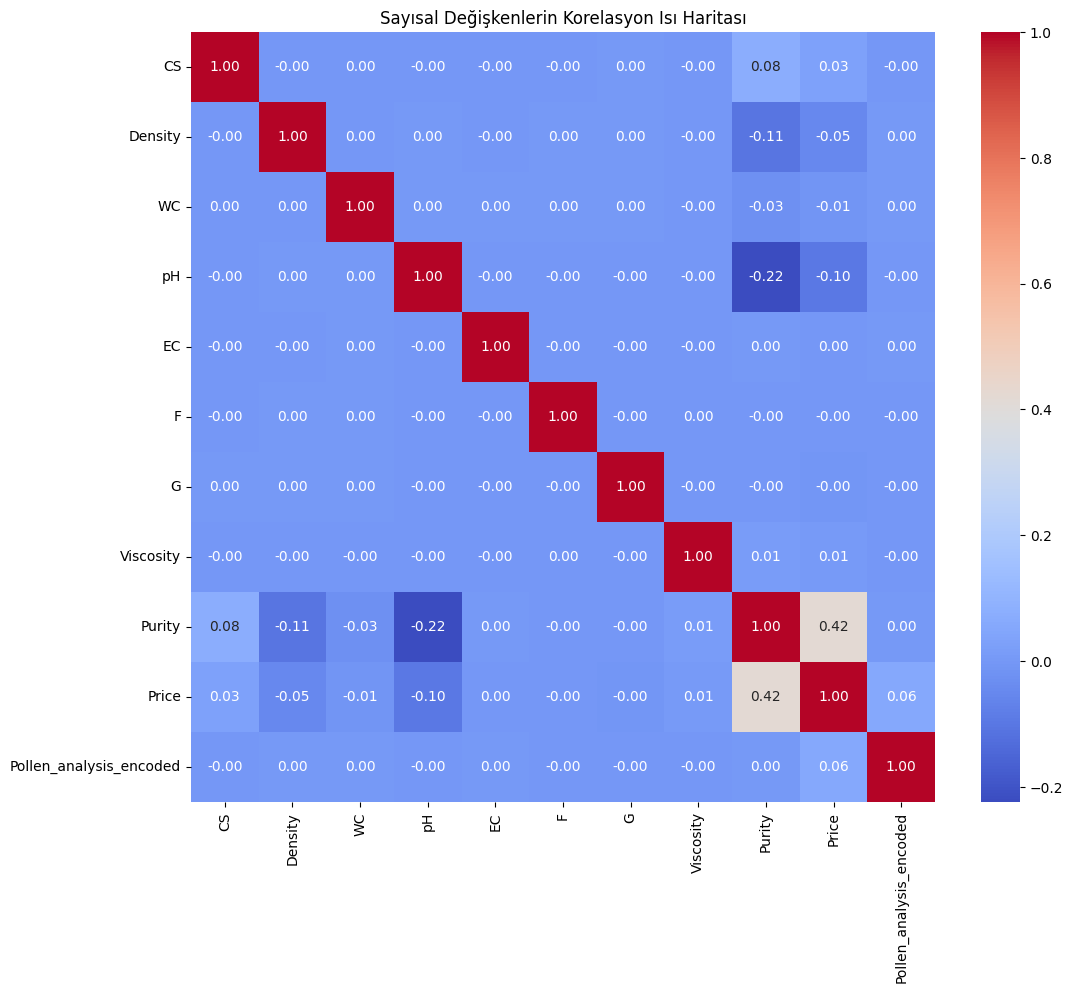

In [57]:
numeric_features = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenlerin Korelasyon Isı Haritası')
plt.show()

* CS (Color Score) ve Purity (0.08): CS ile Purity arasında çok zayıf bir pozitif ilişki vardır. Bu, daha koyu renkli balların az da olsa daha saf olabileceğini gösterebilir.

* Density (Yoğunluk) ve Purity (-0.11): Negatif ilişki vardır. Yoğunluk arttıkça balın saflığı azalma eğilimi gösterebilir, ancak ilişki çok zayıf.

* WC (Water Content - Su İçeriği) ve Purity (-0.22): WC ile saflık arasında zayıf bir negatif ilişki vardır. Daha düşük su içeriği, daha saf bal örneklerini işaret edebilir.

* pH ve Purity (-0.22): Zayıf negatif ilişki. Daha düşük pH seviyeleri daha saf balları temsil edebilir.


* Viscosity ve Purity (0.42): Viskozite ile saflık arasında orta düzeyde pozitif bir ilişki vardır. Daha yüksek viskozite, genelde daha saf bal örneklerini ifade eder.

* Price ve Viscosity (0.42): Viskozite ile fiyat arasında anlamlı bir ilişki vardır. Yüksek viskoziteye sahip ballar, daha yüksek fiyatlandırılabilir.

* Purity ve Price (0.42): Orta düzeyde pozitif bir ilişki var. Saflık arttıkça balın fiyatı da artma eğilimindedir.


Yüksek vizkosite, balın saflığı ve fiyat yüksekliği birbiri ile pozitif ilişkiye sahiptir. ML projesi yapılırken bu üç sütuna dikkat edilmelidir.

##5. Gelecek ML Projelerine Öneriler

Bu projenin sonunda datasetime en uygun ML modelinin Regresyon modeli olduğunu düşünüyorum.

* Regresyon modelini seçme nedenlerim;

Bal fiyatı veya saflık gibi değerleri tahmin etmem gerekiyor. Ben gelecekte fiyat tahminlemesi yapmanın daha güzel bir sonuç vereceğini düşünüyorum. Regresyon modeli bu konularda iyi çalışan bir model.

* Özellikler arasındaki ilişkiler;

Hangi özelliğin neyi ne kadar etkilediğini görmek ve öğrenmek daha iyi modeller oluşturmamda faydalı olabilir. Mesela Viscosity arttığında Price nasıl değişiyor, regresyon bunu net şekilde gösterebilen bir model. Değişkenler arasındaki ilişkileri görmek için güzel bir modeldir.

* Veri setim hakkında;

Veri dağılımım, sınıflar arası dengem iyi olduğu için regresyon modeli çok daha yüksek doğruluk oranıyla çalışabilir. Polen çeşitlerinin hepsi ile öğrenebilir ve tahminleme yapabilir.


Sonuç olarak, hem veri setime uygunluğu hem de açık sonuçlar vermesiyle regresyon modeli bana fazlasıyla uygun gibi görünüyor. 😊